Sistema de recomendación con K-medias


Este es un sistema de recomendación: los sistemas de recomendación estan en todos lados (netflix, amazon, etc), y vamos a crear uno basado en K-medias. Para ello, vamos empezando por cargar un dataset de canciones en formato CSV

In [2]:
# Cargamos las librerías necesarias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargamos el dataset que vamos a usar
df_spotify = pd.read_csv('/content/top 100 downloaded spotify 3 centroides.csv')
print("El tamaño es: ", df_spotify.shape)
df_spotify

El tamaño es:  (100, 15)


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity,POSITIVE
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91,LOW
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88,MEDIUM
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88,HIGH
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86,MEDIUM
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,One Dance,Drake,canadian hip hop,2016,104,61,79,-6,32,43,174,1,6,66,MEDIUM
96,Sugar,Maroon 5,pop,2015,120,79,75,-7,9,88,235,6,3,66,HIGH
97,Emotions,Mark Mendy,pop dance,2021,126,83,66,-5,40,74,172,5,29,66,HIGH
98,Cold Water,Major Lazer,dance pop,2018,93,80,61,-5,16,50,185,7,4,56,MEDIUM


### Transformando en datasets de entrenamiento y prueba.
Ahora, vamos a tomar las columnas "cantidad de accion" y "cantidad de romance", y vamos a transformarlas en nuestras variables a clasificar por K-medias. Como aqui tengo acción y romance, hay que mappear "accion" a 0, y "romance" a 1, para hacer un dataset de entrenamiento y prueba.

In [4]:
# Preparamos los datos que vamos a usar en el modelo
x = df_spotify[['energy', 'valance']].to_numpy()
y = df_spotify['POSITIVE'].map({
    'LOW':0,
    'MEDIUM':1,
    'HIGH':2
}).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [5]:
# Los datos nos quedan de esta forma
print('Valores de x\n', x)
print('\nValores de y\n', y)

Valores de x
 [[73 33]
 [82 56]
 [72 73]
 [41 45]
 [45 17]
 [78 67]
 [30 12]
 [76 55]
 [65 93]
 [33 60]
 [52 66]
 [43 56]
 [56 49]
 [57 22]
 [26 33]
 [32 33]
 [39 44]
 [73 43]
 [78 64]
 [69 50]
 [52 13]
 [38 20]
 [61 47]
 [73 45]
 [64 65]
 [72 90]
 [59 64]
 [56 14]
 [48 91]
 [45 59]
 [59 49]
 [38 52]
 [64 45]
 [39 32]
 [82 29]
 [75 40]
 [66 44]
 [79 67]
 [65 41]
 [71 48]
 [92 85]
 [54 75]
 [45 36]
 [79 68]
 [40 22]
 [62 42]
 [72 16]
 [80 49]
 [42 18]
 [82 75]
 [61 93]
 [51 42]
 [11 20]
 [91 24]
 [59 51]
 [52 39]
 [58 34]
 [68 84]
 [77 73]
 [37 48]
 [73 51]
 [56 86]
 [48 28]
 [86 59]
 [40 55]
 [71 43]
 [85 15]
 [62 64]
 [46 72]
 [61 80]
 [70 61]
 [76 41]
 [87 42]
 [47 34]
 [73 65]
 [54 29]
 [56 35]
 [77 58]
 [80 84]
 [56 46]
 [75 75]
 [57 79]
 [90 47]
 [78 24]
 [68 32]
 [69 60]
 [70 73]
 [54 45]
 [65 17]
 [54 22]
 [83 70]
 [81 27]
 [80 86]
 [74  6]
 [51 45]
 [61 43]
 [79 88]
 [83 74]
 [80 50]
 [73 66]]

Valores de y
 [0 1 2 1 0 1 0 1 2 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 2 1 0 2 1 1 1 1 0 0

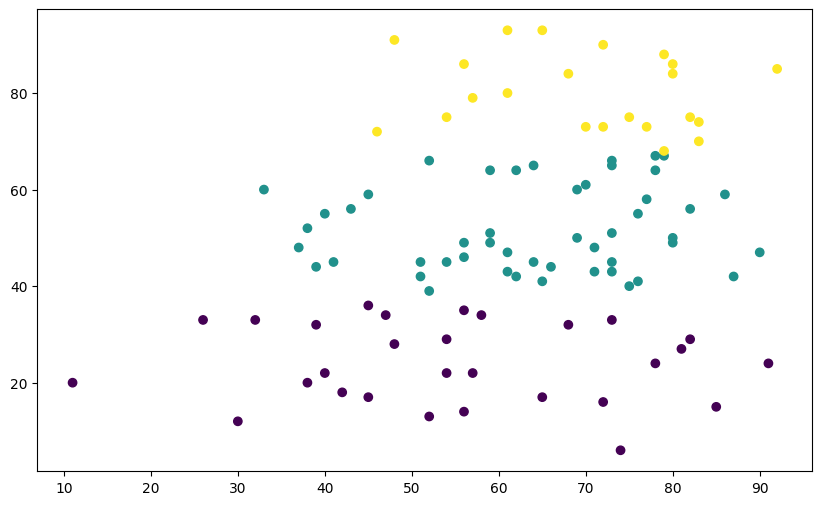

In [6]:
# Graficamos los datos para ver como están distribuidos en el plano
plt.figure(figsize= (10,6))
plt.scatter(x[:,0], x[:,1], c= y)

#### Centroides.
Una vez mappeado, vamos a entrenar el algoritmo de K-medias de forma automática, y extraigamos los centroides obtenidos.

In [7]:
# Entrenamos el modelo y definimos 3 cluster para obtener los centroides
modelo_kmeans = KMeans(n_clusters = 3).fit(x_train)
centroides = modelo_kmeans.cluster_centers_
print(centroides)

[[71.71428571 43.52380952]
 [68.16666667 77.83333333]
 [44.38095238 33.52380952]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


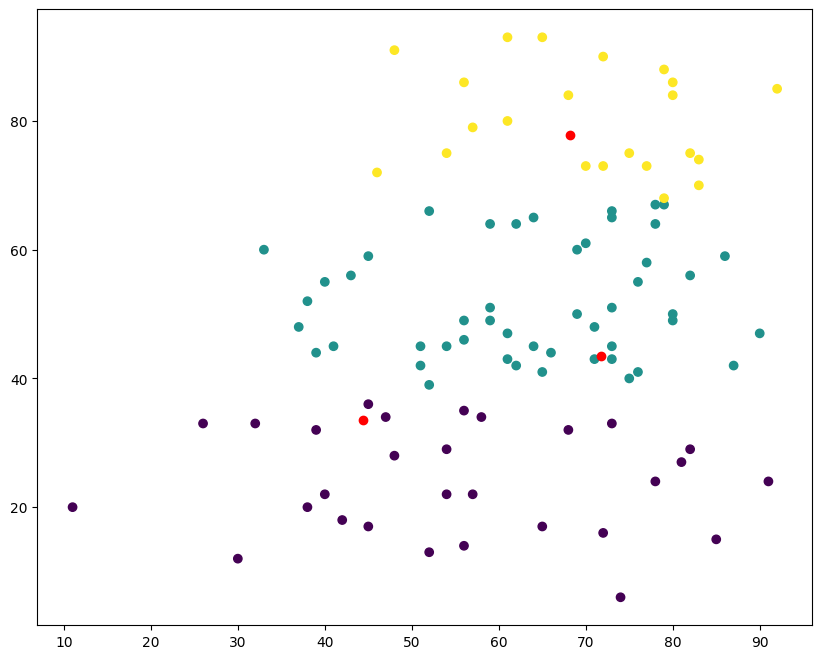

In [13]:
# Graficamos nuevamente los datos con los centroides en las posiciones obtenidas
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1], c= y)
plt.scatter(centroides[:,0],centroides[:,1], c= 'r')

### Sistema de recomendación.
Muy bien! ya tenemos los datos, centroides, y estamos listos para crear un sistema que nos recomiende películas. Para ello usaremos la librería MLUtilites que hemos estado construyendo en esta sesión.

In [14]:
# Cargamos la libreria con nuestras funciones
# En colab hay que cargar el archivo a la unidad virtual de la izquierda
import MLUtilities as utils

Esta función va a recibir los siguientes argumentos en los parametros de entrada.
- listaDeCAnciones: Lista de todas las canciones (solo el texto)
- datosCanciones : Los valores de la matriz que armamos  x(energy y valance)
- cancionEjemplo: energy y valance
- centroides: Matriz de centroides obtenidos del modelo entrenado

In [15]:
def recomiendameCanciones(listaDeCanciones,datosCanciones,cancionEjemplo,centroides):
    #Vamos a buscar el centroide mas cercano (con MLUtilities ;) )
    clasificacionDeseada = utils.centroideCercano(cancionEjemplo, centroides)

    #Luego, vamos a clasificar todas las peliculas por centroides(valoresde x).
    clasificaciones = utils.clasificarPorCentroides(datosCanciones, centroides)

    #Finalmente, sacaremos los indices que hacen match entre clasificaciones.
    indices = np.where(clasificaciones == clasificacionDeseada)[0]

    #Y regresamos la lista de peliculas.
    return listaDeCanciones[indices]

#### Recomiendame una cancion!
Elige un índice del dataframe (por decir algo... 10), y extrae la cancion que elegiste. Luego extrae sus características, y pide las recomendaciones!

In [21]:
#Sientete libre de cambiar este valor.
indice_df = 52

#Extrae la cancion que deseas del dataframe.
cancionElegida = df_spotify.iloc[indice_df]

#Obten las características de la cancion que elegiste.
caracteristicaCancion = cancionElegida[['energy', 'valance']].to_numpy()

#Obten la lista de recomendaciones
recomendaciones = recomiendameCanciones(df_spotify['title'],x, caracteristicaCancion, centroides)

#E imprime lo que hallaste!
print("Porque escuchaste "+cancionElegida['title']+" ...")
print(recomendaciones)

Porque escuchaste when the party's over ...
3                                    Someone You Loved
4                                              Perfect
6                                 lovely (with Khalid)
9                                             Memories
11                                             bad guy
13                                        Lucid Dreams
14                                           All of Me
15                                             7 rings
16                                      Jocelyn Flores
20                          rockstar (feat. 21 Savage)
21                                          Photograph
27                                           The Hills
29                                   Thinking out Loud
31                                       Love Yourself
33                                             Shallow
42                                          God's Plan
44                 Bohemian Rhapsody - Remastered 2011
48                   